In [2]:
import pandas as pd 

In [3]:
house=pd.read_csv('housing.csv')

In [4]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df=pd.DataFrame(house)

In [6]:

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
missing_values = df.isnull().sum()
data_types = df.dtypes
missing_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

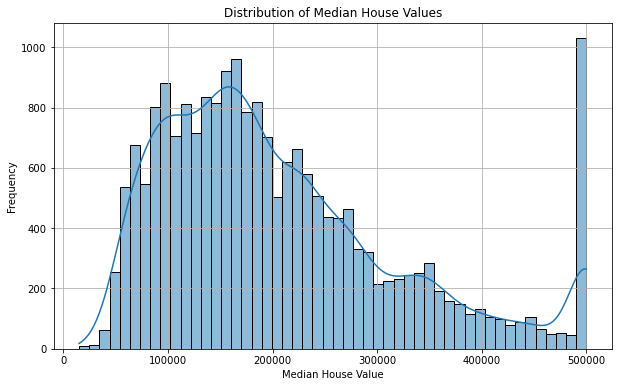

<ipython-input-8-a2d253f0bc5a>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


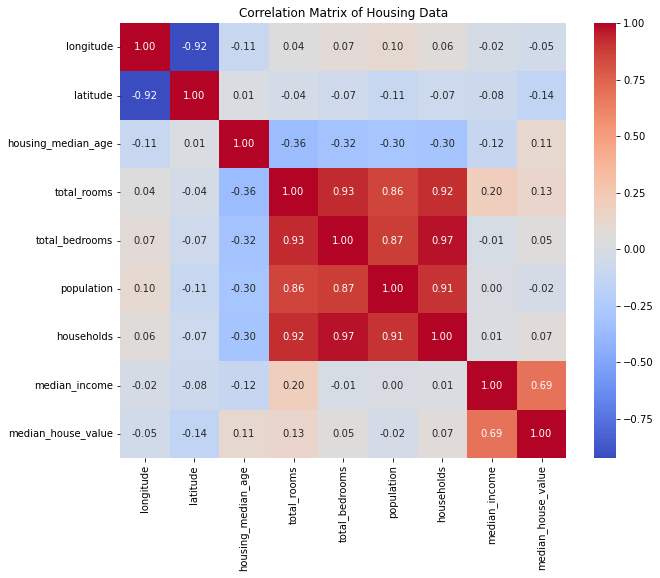

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values in 'total_bedrooms' with the median
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# Convert 'ocean_proximity' to a categorical data type
df['ocean_proximity'] = df['ocean_proximity'].astype('category')


# Summary statistics
summary_statistics = df.describe()

# Distribution of median house values
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Housing Data')
plt.show()

summary_statistics


```Findings for Week 1```


- The distribution of median house values is skewed to the right, indicating that most houses are valued on the lower end of the spectrum, with a few outliers on the higher end.

- The correlation matrix heatmap reveals how different features relate to each other. For instance, median income appears to have a positive correlation with median house value, suggesting that as income increases, house values tend to increase as well.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

housing_data=pd.read_csv('housing.csv')

housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median(), inplace=True)

X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

categorical_features = ['ocean_proximity']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=50))
])

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 49986.70886338071


The initial Random Forest model, with default parameters, achieved a Root Mean Squared Error (RMSE) of approximately $49,986.71 on the test set. This indicates the average deviation of the predicted median house values from the actual values in the dataset. Considering the scale of the median_house_value variable, which ranges into hundreds of thousands, an RMSE of this magnitude suggests that the model has a reasonable level of predictive accuracy, but there's definitely room for improvement.

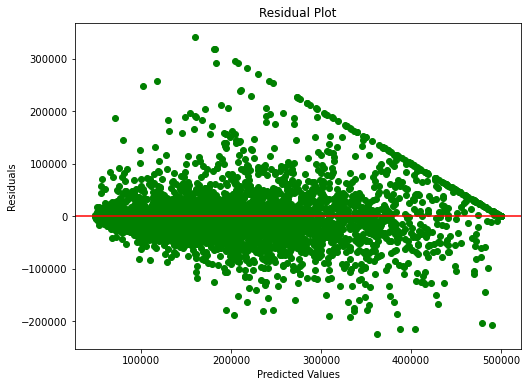

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred, color='green')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

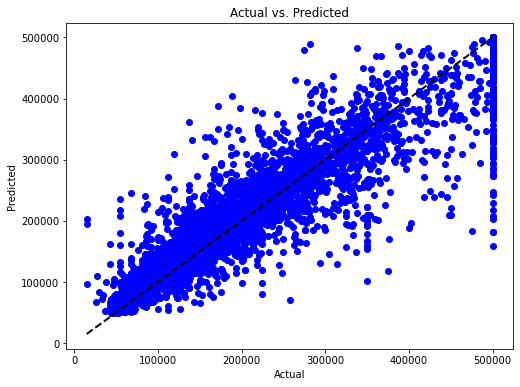

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()